In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/en.openfoodfacts.org.products.tsv", sep = "\t")
df = df[df["countries"]=="US"]
df = df[["nutrition-score-uk_100g", "additives", "ingredients_text"]].dropna()

c:\users\samre\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import sklearn.feature_extraction.text as text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import re

display(df.head())
print(df.shape)

,nutrition-score-uk_100g,additives,ingredients_text
1,14.0,[ bananas -> en:bananas ] [ vegetable-oil -...,"Bananas, vegetable oil (coconut oil, corn oil ..."
2,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,"Peanuts, wheat flour, sugar, rice flour, tapio..."
3,12.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,"Organic hazelnuts, organic cashews, organic wa..."
7,7.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,"Org oats, org hemp granola (org oats, evaporat..."
12,12.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,"Roasted peanuts (peanuts, peanut or canola oil..."


(137471, 3)


In [4]:
# import nltk
# nltk.download('stopwords')
my_stop_words = set( stopwords.words('english')+ \
                    ['de', 'contains', 's', 'et', 'of', 'en', "fr",'less', 'p', 'exists', 'following', 'ok'])

clean_additives = lambda s: re.sub(r'[^a-z- ]+' , " ", s.lower().replace("en:","").replace("->","")).strip()
print(clean_additives("[ peanuts -> en:peanuts ] [ wheat-flour ->")  )

clean_ingre = lambda s: " ".join( map( lambda s1: s1.strip().replace(" ", "-") , s.lower().replace(".","").replace("(",",").replace(")",",").split(",") ) )
print(clean_ingre("Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor."))


peanuts  peanuts     wheat-flour
bananas vegetable-oil coconut-oil corn-oil-and/or-palm-oil sugar natural-banana-flavor


In [5]:
df_clean = df.copy()
df_clean["additives"] = df_clean["additives"].apply(clean_additives)
df_clean["ingredients_text"] = df_clean["ingredients_text"].apply(clean_ingre)

In [6]:
vectorizer = text.TfidfVectorizer(strip_accents="unicode",stop_words=my_stop_words, \
                                  ngram_range=(1,2),max_features=30)
vectors = vectorizer.fit_transform(df_clean["additives"])
feature_names = vectorizer.get_feature_names()
print(len(feature_names))
dense = vectors.todense()

feature_names = ["ADD:"+fn for fn in feature_names]
df_additive_features = pd.DataFrame(dense, columns=feature_names)

display(df_additive_features)

30


,ADD:acid,ADD:artificial,ADD:cheese,ADD:concentrate,ADD:corn,ADD:corn syrup,ADD:extract,ADD:flavor,ADD:flavors,ADD:flour,...,ADD:salt,ADD:salt salt,ADD:soybean,ADD:starch,ADD:sugar,ADD:sugar sugar,ADD:syrup,ADD:water,ADD:wheat,ADD:wheat flour
0,0.0,0.0,0.0,0.000000,0.080898,0.0,0.0,0.277684,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.438304,0.063226,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.564470,...,0.180341,0.091747,0.000000,0.648647,0.103166,0.052087,0.000000,0.115556,0.294746,0.159855
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.202865,0.103206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.350773,0.285184,0.0,0.0,0.000000,0.0,0.369026,...,0.128618,0.065433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.079545,0.0,0.0,0.000000,0.0,0.252648,...,0.215248,0.136882,0.000000,0.193550,0.000000,0.000000,0.273369,0.137923,0.351796,0.190797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137466,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.467339,0.237755,0.441017,0.000000,0.267347,0.134978,0.000000,0.299453,0.000000,0.000000
137467,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.189635,0.096475,0.000000,0.000000,0.000000,0.000000,0.000000,0.243022,0.000000,0.000000
137468,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.148811,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.536718,0.000000,0.000000,0.000000
137469,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
vectorizer = text.TfidfVectorizer(strip_accents="unicode",stop_words=my_stop_words, \
                                  ngram_range=(1,2),max_features=30)
vectors = vectorizer.fit_transform(df_clean["ingredients_text"])
feature_names = vectorizer.get_feature_names()
# print(len(feature_names))
dense = vectors.todense()

feature_names = ["ING:"+fn for fn in feature_names]
df_ingre_features = pd.DataFrame(dense, columns=feature_names)

display(df_ingre_features)

,ING:acid,ING:cheese,ING:citric,ING:citric acid,ING:color,ING:corn,ING:corn syrup,ING:flavor,ING:flour,ING:folic,...,ING:sodium,ING:soy,ING:soybean,ING:starch,ING:sugar,ING:syrup,ING:vitamin,ING:water,ING:wheat,ING:wheat flour
0,0.0,0.0,0.0,0.0,0.0,0.251813,0.0,0.295316,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.194905,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.456822,0.0,...,0.0,0.270403,0.000000,0.52494,0.166987,0.000000,0.000000,0.187047,0.477072,0.258755
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.681703,0.0,0.000000,0.541295,0.0,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.267576,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.142934,0.0,0.000000,0.151326,0.0,...,0.0,0.179146,0.000000,0.17389,0.000000,0.163739,0.000000,0.247843,0.474101,0.171429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137466,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.624905,0.00000,0.378828,0.000000,0.000000,0.424336,0.000000,0.000000
137467,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.342605,0.000000,0.000000
137468,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.058494,0.0,...,0.0,0.069248,0.000000,0.00000,0.000000,0.189877,0.000000,0.000000,0.000000,0.000000
137469,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
df_features = pd.concat([df_additive_features, df_ingre_features], axis=1)
df_features["nutrition-score-uk_100g"] = df_clean["nutrition-score-uk_100g"]
df_features=df_features.dropna()
display(df_features)
df_features.to_csv("../data/tfidf_features.csv")

,ADD:acid,ADD:artificial,ADD:cheese,ADD:concentrate,ADD:corn,ADD:corn syrup,ADD:extract,ADD:flavor,ADD:flavors,ADD:flour,...,ING:soy,ING:soybean,ING:starch,ING:sugar,ING:syrup,ING:vitamin,ING:water,ING:wheat,ING:wheat flour,nutrition-score-uk_100g
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.564470,...,0.270403,0.0,0.52494,0.166987,0.0,0.000000,0.187047,0.477072,0.258755,14.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.350773,0.285184,0.0,0.0,0.0,0.0,0.369026,...,0.000000,0.0,0.00000,0.000000,0.0,0.267576,0.000000,0.000000,0.000000,12.0
7,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.0
12,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.822228,...,0.312621,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137453,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.136866,0.0,0.000000,0.153308,0.000000,0.000000,-5.0
137454,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.338243,0.0,0.000000,0.378876,0.000000,0.000000,10.0
137455,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.292487,0.0,0.000000,0.327623,0.000000,0.000000,13.0
137469,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-2.0


"Briefly, the FSA score was computed for each food and beverage on the basis of the nutrient content per 100 g. Positive points (0 to +10) are allocated for the content of energy (kJ), SFA (g), total sugar (g), and sodium (mg), while negative points (0 to −5) are allocated for the content of fruits/vegetables/nuts (g), dietary fiber (g), and protein (g). Scores for foods and beverages are thus based on a discrete continuous scale theoretically ranging from −15 (most healthy) to +40 (least healthy)"
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5598004/#:~:text=Aggregated%20scores%20at%20the%20individual,for%20all%20foods%20and%20beverages

-10.0 40.0


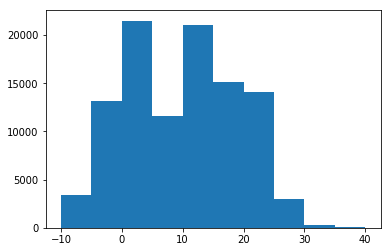

In [27]:

plt.hist(df_features["nutrition-score-uk_100g"])
print(min(df_features["nutrition-score-uk_100g"]), max(df_features["nutrition-score-uk_100g"]))

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_features, test_size=0.3, random_state=69)

print(train.shape, test.shape)
display(train)

(72242, 61) (30961, 61)


,ADD:acid,ADD:artificial,ADD:cheese,ADD:concentrate,ADD:corn,ADD:corn syrup,ADD:extract,ADD:flavor,ADD:flavors,ADD:flour,...,ING:soy,ING:soybean,ING:starch,ING:sugar,ING:syrup,ING:vitamin,ING:water,ING:wheat,ING:wheat flour,nutrition-score-uk_100g
37867,0.164726,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.268605,0.000000,0.0,0.300872,0.000000,0.000000,2.0
53624,0.000000,0.000000,0.000000,0.0,0.146268,0.000000,0.327543,0.000000,0.000000,0.619426,...,0.211811,0.000000,0.205597,0.130804,0.000000,0.0,0.146517,0.373698,0.405373,8.0
95792,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,21.0
1246,0.204123,0.156310,0.000000,0.0,0.074303,0.047159,0.000000,0.170031,0.213832,0.196666,...,0.214428,0.109218,0.000000,0.066210,0.097993,0.0,0.074164,0.094579,0.102595,24.0
66178,0.000000,0.000000,0.000000,0.0,0.933511,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.370019,0.000000,0.000000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62346,0.349221,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.438998,0.000000,...,0.000000,0.362417,0.000000,0.219703,0.000000,0.0,0.000000,0.000000,0.000000,15.0
32948,0.000000,0.528234,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.722625,0.000000,...,0.000000,0.000000,0.000000,0.243942,0.000000,0.0,0.273247,0.000000,0.000000,-4.0
13435,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0
92339,0.204459,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.827359,...,0.000000,0.000000,0.000000,0.171312,0.000000,0.0,0.000000,0.244714,0.265456,14.0


here
here
here
here
here


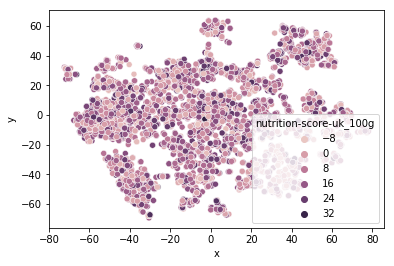

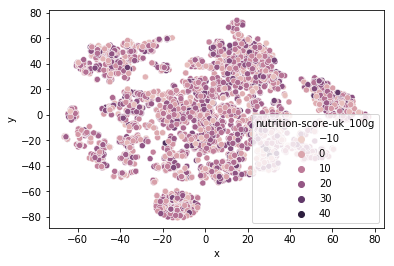

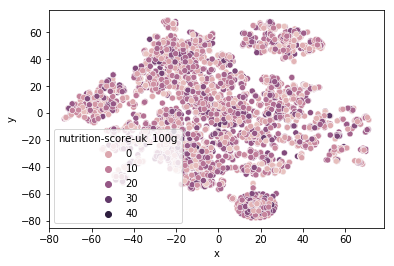

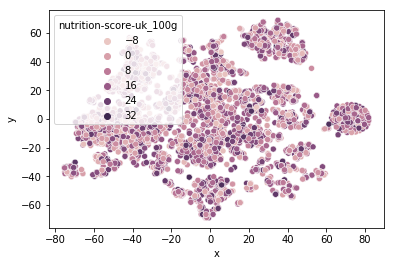

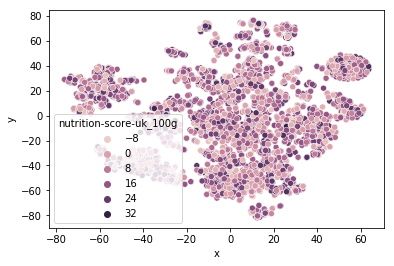

In [58]:
from sklearn.manifold import TSNE
import seaborn as sns



for _ in range(5):
    df_features_sample = df_features.sample(5000)
    
    tsne = TSNE(perplexity=30, random_state=69)
    data_tsne = tsne.fit_transform(df_features_sample.iloc[:,:-1])

    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df_features_sample.index)
    df_features_tsne = pd.concat([df_features_sample, df_tsne], axis=1)

    print("here")
    plt.figure()
    sns.scatterplot( x="x", y="y", hue="nutrition-score-uk_100g", data=df_features_tsne)
    


From some quick TSNE of data samples, the separation by nutrition scores seems very bad. All of the attempted regression/classification below performs very poorly, barely doing better than baselines of predict mean score/predict most frequent class. 

### Attempting dimensionality reduction of TF-IDF features

In [52]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=10, n_iter=10, random_state=69)
tsvd.fit(train.iloc[:,:-1])
print(tsvd.explained_variance_ratio_)
print(tsvd.explained_variance_ratio_.sum())

0.6261446501664482


81.79814391520067
-2.3622738402506727e-05
[-0.04966505  0.05952127  0.         -0.18735513  0.          0.12821917
  0.2468347  -0.          0.18819162 -0.05316514] 9.420338297301283


(array([   7.,   85.,  815., 4058., 4508., 6180., 3625., 5861., 4524.,
        1298.]),
 array([-30.5065024, -25.5187136, -20.5309248, -15.543136 , -10.5553472,
         -5.5675584,  -0.5797696,   4.4080192,   9.395808 ,  14.3835968,
         19.3713856]),
 <a list of 10 Patch objects>)

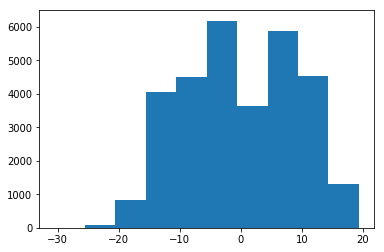

In [54]:
from sklearn.linear_model import Lasso

X_train_transformed = tsvd.transform(train.iloc[:,:-1])
X_test_transformed = tsvd.transform(test.iloc[:,:-1])

lasso = Lasso(alpha=0.01, max_iter=1000, tol=1e-4, random_state=69, selection="random")
lasso.fit(X_train_transformed, train["nutrition-score-uk_100g"])
lasso_resid = lasso.predict(X_test_transformed)-test["nutrition-score-uk_100g"]

print(np.mean((lasso_resid)**2) )
print(lasso.score(X_test_transformed, test["nutrition-score-uk_100g"]))
print(lasso.coef_, lasso.intercept_)

plt.hist(lasso_resid)

81.78554019729799
0.00013046407865369147
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  9.30261459e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.93880242e-01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.58517465e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.00296363e-02
  1.45163568e-01  0.00000000e+00 -3.13651052e-01  3.60160322e-02
 -0.00000000e+00 -4.31702786e-01  4.58756616e-04 -6.52232384e-01
  0.00000000e+00  0.00000000e+00 -8.47088677e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.52018504e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.24368860e-01 -2.58446984e-01 -4.48982763e-02  8.30543260e-02
  0.00000000e+00  4.88913422e-02 -2.65879853e-02  2.21901868e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -4.43359645e-01 -0.00000000e+00 -0.00000000e+00 

(array([   7.,   80.,  763., 3889., 4561., 6247., 3648., 5727., 4694.,
        1345.]), array([-30.49161655, -25.50783477, -20.524053  , -15.54027123,
        -10.55648946,  -5.57270769,  -0.58892592,   4.39485586,
          9.37863763,  14.3624194 ,  19.34620117]), <a list of 10 Patch objects>)

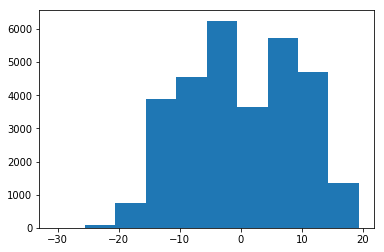

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.005, max_iter=1000, tol=1e-4, random_state=69, selection="random")
lasso.fit(train.iloc[:,:-1], train["nutrition-score-uk_100g"])
lasso_resid = lasso.predict(test.iloc[:,:-1])-test["nutrition-score-uk_100g"]

print(np.mean((lasso_resid)**2) )
print(lasso.score(test.iloc[:,:-1], test["nutrition-score-uk_100g"]))
print(lasso.coef_, lasso.intercept_)

plt.hist(lasso_resid)

In [12]:
print(list(df_features.columns))

['ADD:acid', 'ADD:artificial', 'ADD:cheese', 'ADD:concentrate', 'ADD:corn', 'ADD:corn syrup', 'ADD:extract', 'ADD:flavor', 'ADD:flavors', 'ADD:flour', 'ADD:flour flour', 'ADD:juice', 'ADD:milk', 'ADD:milk milk', 'ADD:mononitrate', 'ADD:natural', 'ADD:oil', 'ADD:oil oil', 'ADD:organic', 'ADD:powder', 'ADD:salt', 'ADD:salt salt', 'ADD:soybean', 'ADD:starch', 'ADD:sugar', 'ADD:sugar sugar', 'ADD:syrup', 'ADD:water', 'ADD:wheat', 'ADD:wheat flour', 'ING:acid', 'ING:cheese', 'ING:citric', 'ING:citric acid', 'ING:color', 'ING:corn', 'ING:corn syrup', 'ING:flavor', 'ING:flour', 'ING:folic', 'ING:folic acid', 'ING:garlic', 'ING:gum', 'ING:milk', 'ING:natural', 'ING:oil', 'ING:organic', 'ING:powder', 'ING:riboflavin', 'ING:salt', 'ING:sodium', 'ING:soy', 'ING:soybean', 'ING:starch', 'ING:sugar', 'ING:syrup', 'ING:vitamin', 'ING:water', 'ING:wheat', 'ING:wheat flour', 'nutrition-score-uk_100g']


In [13]:
from sklearn.tree import DecisionTreeRegressor as DTR

dtr = DTR(criterion="mse", splitter="best", min_samples_leaf=1000, random_state=69)
dtr.fit(train.iloc[:,:-1], train["nutrition-score-uk_100g"])


DecisionTreeRegressor(min_samples_leaf=1000, random_state=69)

In [14]:
dtr.feature_importances_

dtr_resid = dtr.predict(test.iloc[:,:-1])-test["nutrition-score-uk_100g"]

print(np.mean((dtr_resid)**2) )
print(train.iloc[:,:-1].columns)

81.8664768935381
Index(['ADD:acid', 'ADD:artificial', 'ADD:cheese', 'ADD:concentrate',
       'ADD:corn', 'ADD:corn syrup', 'ADD:extract', 'ADD:flavor',
       'ADD:flavors', 'ADD:flour', 'ADD:flour flour', 'ADD:juice', 'ADD:milk',
       'ADD:milk milk', 'ADD:mononitrate', 'ADD:natural', 'ADD:oil',
       'ADD:oil oil', 'ADD:organic', 'ADD:powder', 'ADD:salt', 'ADD:salt salt',
       'ADD:soybean', 'ADD:starch', 'ADD:sugar', 'ADD:sugar sugar',
       'ADD:syrup', 'ADD:water', 'ADD:wheat', 'ADD:wheat flour', 'ING:acid',
       'ING:cheese', 'ING:citric', 'ING:citric acid', 'ING:color', 'ING:corn',
       'ING:corn syrup', 'ING:flavor', 'ING:flour', 'ING:folic',
       'ING:folic acid', 'ING:garlic', 'ING:gum', 'ING:milk', 'ING:natural',
       'ING:oil', 'ING:organic', 'ING:powder', 'ING:riboflavin', 'ING:salt',
       'ING:sodium', 'ING:soy', 'ING:soybean', 'ING:starch', 'ING:sugar',
       'ING:syrup', 'ING:vitamin', 'ING:water', 'ING:wheat',
       'ING:wheat flour'],
      dtype='o

In [48]:
from sklearn.tree import DecisionTreeClassifier as DTC

def score_to_class(input):
    out=[]
    for i in input:
#         if i<5:
#             o=0
#         elif i<15:
#             o=1
#         else:
#             o=2
        if i<10:
            o=0
        else:
            o=1
        out.append(o)
    return(np.array(out))

dtc = DTC(criterion="gini", splitter="best", max_depth=10, random_state=69)
train_class = score_to_class(train["nutrition-score-uk_100g"])
dtc.fit(train.iloc[:,:-1], train_class )
print(pd.Series(train_class).value_counts() )
print(np.mean(train_class==1))

1    37483
0    34759
dtype: int64
0.518853298635143


In [49]:
from sklearn.metrics import confusion_matrix
dtc_pred = dtc.predict(train.iloc[:,:-1])
true_classes = score_to_class(train["nutrition-score-uk_100g"] )
print(pd.Series(dtc_pred).value_counts() )


print(np.mean(dtc_pred==true_classes ) )
print(confusion_matrix(true_classes, dtc_pred))

1    58609
0    13633
dtype: int64
0.5416516707732344
[[ 7640 27119]
 [ 5993 31490]]


In [43]:
from xgboost import XGBRegressor as XGBR
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import cross_val_score

# tbd